<a href="https://colab.research.google.com/github/HassanAbdulJabbar/Weather-prediction/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive


In [22]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import numpy as np
import pandas as pd 
austin_weather = pd.read_csv('/content/drive/MyDrive/DATA SETS COLAB/austin_weather.csv')

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
austin_weather.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [26]:
austin_weather = austin_weather.drop(['Events', 'Date', 'SeaLevelPressureHighInches',  
                  'SeaLevelPressureLowInches','TempHighF','TempLowF','DewPointHighF','DewPointLowF','HumidityHighPercent','HumidityLowPercent','VisibilityHighMiles','VisibilityLowMiles','WindHighMPH','WindGustMPH' ], axis = 1) 

In [27]:
austin_weather.head()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches
0,60,49,75,29.68,7,4,0.46
1,48,36,68,30.13,10,6,0
2,45,27,52,30.49,10,3,0
3,46,28,56,30.45,10,4,0
4,50,40,71,30.33,10,2,T


In [28]:
austin_weather = austin_weather.replace('T', 0.0) 

In [29]:
austin_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TempAvgF                   1319 non-null   int64 
 1   DewPointAvgF               1319 non-null   object
 2   HumidityAvgPercent         1319 non-null   object
 3   SeaLevelPressureAvgInches  1319 non-null   object
 4   VisibilityAvgMiles         1319 non-null   object
 5   WindAvgMPH                 1319 non-null   object
 6   PrecipitationSumInches     1319 non-null   object
dtypes: int64(1), object(6)
memory usage: 72.3+ KB


In [30]:
austin_weather = austin_weather.replace('-', np.NaN) 

In [31]:
austin_weather = austin_weather.dropna()

In [32]:
austin_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1318
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TempAvgF                   1307 non-null   int64 
 1   DewPointAvgF               1307 non-null   object
 2   HumidityAvgPercent         1307 non-null   object
 3   SeaLevelPressureAvgInches  1307 non-null   object
 4   VisibilityAvgMiles         1307 non-null   object
 5   WindAvgMPH                 1307 non-null   object
 6   PrecipitationSumInches     1307 non-null   object
dtypes: int64(1), object(6)
memory usage: 81.7+ KB


In [33]:
austin_weather["DewPointAvgF"] = austin_weather["DewPointAvgF"].astype(float)

In [34]:
austin_weather["HumidityAvgPercent"] = austin_weather["HumidityAvgPercent"].astype(float)

In [35]:
austin_weather["SeaLevelPressureAvgInches"] = austin_weather["SeaLevelPressureAvgInches"].astype(float)

In [36]:
austin_weather["VisibilityAvgMiles"] = austin_weather["VisibilityAvgMiles"].astype(float)

In [37]:
austin_weather["WindAvgMPH"] = austin_weather["WindAvgMPH"].astype(float)

In [38]:
austin_weather["PrecipitationSumInches"] = austin_weather["PrecipitationSumInches"].astype(float)

In [39]:
austin_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1318
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TempAvgF                   1307 non-null   int64  
 1   DewPointAvgF               1307 non-null   float64
 2   HumidityAvgPercent         1307 non-null   float64
 3   SeaLevelPressureAvgInches  1307 non-null   float64
 4   VisibilityAvgMiles         1307 non-null   float64
 5   WindAvgMPH                 1307 non-null   float64
 6   PrecipitationSumInches     1307 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 81.7 KB


In [40]:
Y = austin_weather['PrecipitationSumInches']

In [41]:
Y = Y.values.reshape(-1, 1) 

In [42]:
X = austin_weather.drop(['PrecipitationSumInches'], axis = 1)

In [43]:
X.head()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
0,60,49.0,75.0,29.68,7.0,4.0
1,48,36.0,68.0,30.13,10.0,6.0
2,45,27.0,52.0,30.49,10.0,3.0
3,46,28.0,56.0,30.45,10.0,4.0
4,50,40.0,71.0,30.33,10.0,2.0


In [44]:
Y[5]

array([0.])

In [45]:
Rain = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
Rain.fit(X_train, Y_train)

LinearRegression()

In [46]:
Y_pred = Rain.predict(X_test)
print('Mean absolute error = ' + str(mean_absolute_error(Y_test, Y_pred)))
print('Mean squared error = ' + str(mean_squared_error(Y_test, Y_pred)))
print('R2 score = ' + str(r2_score(Y_test, Y_pred)))

Mean absolute error = 0.1707913547183198
Mean squared error = 0.21740920837808606
R2 score = 0.21352353677687697


In [47]:
Rain.coef_

array([[ 0.00492566, -0.00462525,  0.00662064, -0.11977978, -0.09337195,
         0.00245163]])

In [48]:
coeff_austin=pd.DataFrame(Rain.coef_[0],X.columns,columns=['Coefficient'])

In [49]:
coeff_austin

,Coefficient
TempAvgF,0.004926
DewPointAvgF,-0.004625
HumidityAvgPercent,0.006621
SeaLevelPressureAvgInches,-0.119780
VisibilityAvgMiles,-0.093372
WindAvgMPH,0.002452


In [50]:
austin_weather.corr()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches
TempAvgF,1.000000,0.895020,0.033040,-0.621492,0.210172,0.037003,-0.018420
DewPointAvgF,0.895020,1.000000,0.453475,-0.630993,-0.063717,0.037517,0.127098
HumidityAvgPercent,0.033040,0.453475,1.000000,-0.181596,-0.584849,-0.002244,0.346870
SeaLevelPressureAvgInches,-0.621492,-0.630993,-0.181596,1.000000,0.066803,-0.180911,-0.123656
VisibilityAvgMiles,0.210172,-0.063717,-0.584849,0.066803,1.000000,0.021949,-0.434041
WindAvgMPH,0.037003,0.037517,-0.002244,-0.180911,0.021949,1.000000,0.034089
PrecipitationSumInches,-0.018420,0.127098,0.346870,-0.123656,-0.434041,0.034089,1.000000


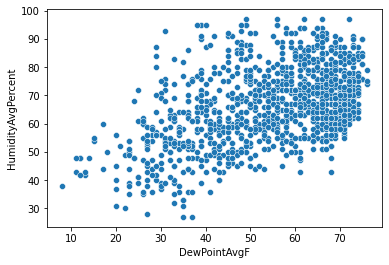

In [51]:
sns.scatterplot(x="DewPointAvgF", y="HumidityAvgPercent",data=austin_weather)

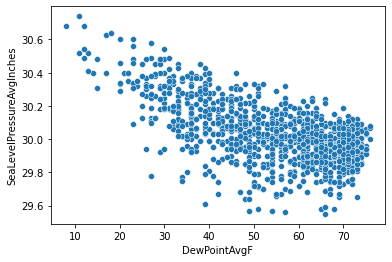

In [52]:
sns.scatterplot(x="DewPointAvgF", y="SeaLevelPressureAvgInches",data=austin_weather)

In [53]:
y_test = list()
for i in Y_test:
  y_test.append(i[0])

In [54]:
y_test

[0.07,
 0.58,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 2.17,
 0.0,
 0.0,
 0.4,
 0.01,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.68,
 0.49,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.04,
 0.86,
 0.0,
 0.0,
 0.16,
 0.0,
 0.51,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.22,
 0.16,
 0.17,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.02,
 0.43,
 0.0,
 0.0,
 0.21,
 0.0,
 0.76,
 0.0,
 0.54,
 0.06,
 0.0,
 0.0,
 0.0,
 0.07,
 0.0,
 0.0,
 1.05,
 0.0,
 0.0,
 0.09,
 0.0,
 0.0,
 0.0,
 0.17,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.43,
 0.0,
 0.0,
 0.0,
 0.31,
 0.66,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.33,
 0.0,
 1.41,
 0.0,
 0.02,
 2.18,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.13,
 0.0,
 0.0,
 0.06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.56,
 0.02,
 0.0,
 0.0

In [55]:
y_pred = list()
for i in Y_pred:
  y_pred.append(i[0])

In [56]:
y_pred

[0.1977558735607805,
 0.1320067369553981,
 0.09537177940037456,
 -0.07778462932197971,
 0.046333212285545766,
 0.06756096201387818,
 0.035731184603271515,
 0.02540443391512781,
 0.2753407300744133,
 0.025179929550084967,
 -0.03028784630833581,
 0.04305728785662044,
 -0.024493226460553075,
 -0.07826849459403107,
 0.06525632047523944,
 0.1555400828397433,
 0.2219191081737346,
 -0.019999647087181494,
 0.1627130072882621,
 0.6445720604684961,
 0.030892783021294612,
 0.3809238709344598,
 0.21741079082802628,
 0.9016961332243483,
 0.15563508662495407,
 0.023220984332049888,
 0.029985932452746944,
 0.1809327799693894,
 0.01939543347804218,
 -0.00627340302183832,
 0.011118459299042094,
 0.009755265114434586,
 -0.10731083960607535,
 -0.06196701141270822,
 0.0802497474445425,
 0.00997478094014781,
 0.012651252678522518,
 0.2099556991170224,
 0.2160480519238117,
 0.03135984996247032,
 0.03669793101381513,
 0.5896756998043071,
 0.19760005042370477,
 0.0768496117761801,
 0.07072017590734792,
 -0.02

In [57]:
austin_weather2 = pd.DataFrame(data = (zip(y_test,y_pred)),columns=['Actual','Predicted'])

In [58]:
austin_weather2

,Actual,Predicted
0,0.07,0.197756
1,0.58,0.132007
2,0.00,0.095372
3,0.00,-0.077785
4,0.00,0.046333
...,...,...
322,0.00,0.026354
323,0.00,0.018203
324,0.00,-0.006842
325,0.00,-0.149374


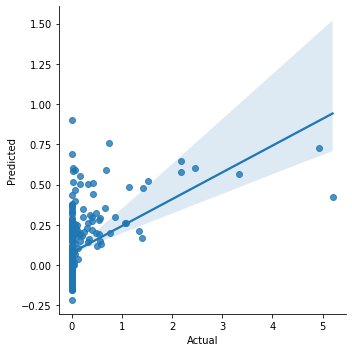

In [59]:
sns.lmplot(x='Actual',y='Predicted',data=austin_weather2)

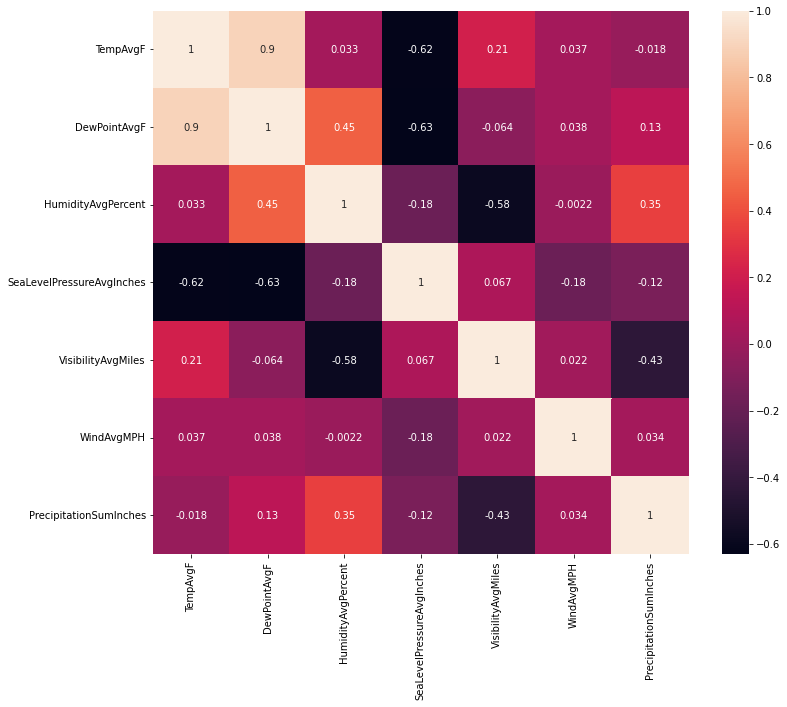

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(austin_weather.corr(),annot=True)